## <center>Computer Science Intensive Course - MindX</center>
![](./assets/logo.png)
# <center>LAB 11. THUẬT TOÁN TÌM ĐƯỜNG (1)</center>

## Bài 1. Tìm Đường

Cho một tập hợp đảo và các tuyến tàu hai chiều giữa các đảo. Ta chỉ có thể di chuyển từ đảo A đến đảo B (A khác B) nếu có ít nhất một trong ba điều kiện sau xảy ra:
- Có tuyến tàu từ A đến B
- Tồn tại một đảo C sao cho có tuyến tàu từ A đến C và từ C đến B
- Tồn tại đảo D và đảo E sao cho có tuyến tàu AD, EB và ta có thể di chuyển từ D đến E

**Yêu cầu**: Cho thông tin về tập hợp các đảo, tuyến tàu và hai đảo A, B khác nhau. Hãy tìm một lộ trình để đi từ đảo A đến đảo B sao cho không đảo nào được đi qua quá 1 lần.

**Input**: Một đồ thị vô hướng không trọng số dưới dạng danh sách kề, với các đỉnh là các số nguyên được đánh số từ 0 tương ứng với các đảo.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Biết *1 < số đảo < 100* và *0 <= số tuyến tàu < 1000*.  
**Output**: Một list là danh sách các đảo nằm trên lộ trình từ A đến B. Trả về list rỗng nếu không tồn tại đường đi từ A đến B.  
**Ví dụ**:  

- Input: <code>graph</code>, 0, 2
- Output: [0, 1, 2] hoặc [0, 1, 3, 2] hoặc [0, 1, 4, 3, 2] hoặc [0, 4, 1, 2] hoặc [0, 4, 3, 2] hoặc [0, 4, 1, 3, 2] hoặc [0, 4, 3, 1, 2]

![](./assets/graph2.png)

In [1]:
graph = {
    0: [1, 4],
    1: [0, 2, 3, 4],
    2: [1, 3],
    3: [1, 2, 4],
    4: [0, 1, 3]
}

In [2]:
def traverse(graph, current_island, island_b, visited, path):
  # kiem tra diem da duoc xet chuaw
  visited.add(current_island)
  # them duong di vao danh sach cac dao da di qua
  path.append(current_island)
  # dung lo trinh neu gap diem B
  if current_island == island_b:
    return True
  # de quy cho nhung dao tiep theo (co lien ket voi dao hien tai)
  for vertex in graph[current_island]:
    if vertex not in visited:
      if traverse(graph, vertex, island_b, visited, path):
        return True # neu lo trinh da gap diem B

  # truong hop dao hien tai khong co duong den B
  path.pop(-1) # quy nguoc lai diem gan nhat => xet tiep nhung duong khac
  return False

In [3]:
def find_path(graph, island_a, island_b):
  # thuat toan depht first search
  path = []
  # bat dau di tu A
  traverse(graph=graph, current_island=island_a, island_b=island_b, visited=set(), path=path)
  if len(path) == 0:
    return []
  return path

In [4]:
find_path(graph, 0, 2)

[0, 1, 2]

## Bài 2. Tạo Mê Cung

Một ứng dụng thú vị của thuật toán DFS là tạo mê cung ngẫu nhiên.  

Ý tưởng của thuật toán là dùng DFS để tìm đường ngẫu nhiên trên một ma trận có kích thước cho trước. Lộ trình DFS đi qua chính là mê cung được tạo.  

Cụ thể hơn, ta thực hiện các bước:
1. Khởi tạo mê cung với kích thước cho trước. Mỗi ô trong mê cung đều có tường ở 4 hướng: trên, dưới, trái, phải.
2. Chọn điểm bắt đầu và kết thúc của mê cung. Xóa tường phía ngoài của hai điểm này để tạo đường thoát khỏi mê cung.
3. Dùng thuật toán DFS để duyệt từ điểm bắt đầu. Ở mỗi bước duyệt:
   - Xóa tường giữa ô đang duyệt và ô trước đó
   - Chọn một ô ngẫu trên trong 4 ô cùng cạnh để tiếp tục duyệt
   
**Ví dụ** về quá trình tạo một mê cung:
![](./assets/maze-demo.gif)
   
Ta lưu mê cung bằng hai mảng hai chiều dưới dạng list của list:
- <code>vertical</code>: chứa các tường theo chiều dọc.
- <code>horizontal</code>: chứa các tường theo chiều ngang.

Xem ví dụ phía dưới. Hàm <code>plot_maze()</code> để vẽ mê cung từ <code>vertical</code> và <code>horizontal</code> đã được viết sẵn, với <code>fig_height</code> là kích thước mê cung hiển thị trên màn hình.

In [5]:
import matplotlib.pyplot as plt

plt.style.use('default')

def plot_maze(vertical, horizontal, fig_height=8):

    # init height & width
    height = len(vertical)
    width = len(vertical[0])

    # init figure
    fig = plt.figure(figsize=(fig_height*2, fig_height))
    fig.patch.set_visible(False)

    # draw maze borders
    for row in range(height):
        for col in range(width):
            if vertical[row][col]:
                plt.plot((col, col), (row, row+1), color='white')
            if horizontal[row][col]:
                plt.plot((col, col+1), (row, row), color='white')

    # draw surrounding borders on the right & bottom
    plt.plot((width, width), (0, height-1), color='white')
    plt.plot((0, width), (height, height), color='white')

    # styling the plot
    ax = plt.gca()
    ax.set_facecolor((0, 0, 0))
    ax.set_ylim(ax.get_ylim()[::-1])
    plt.xticks([])
    plt.yticks([])

    # add arrows
    plt.arrow(0, 0.5, 0.8, 0, width=0.07, length_includes_head=True, color='white')
    plt.arrow(width-0.8, height-0.5, 0.8, 0, width=0.07, length_includes_head=True, color='white')

    plt.show()

Mỗi phần tử trong <code>vertical</code> tương ứng với mảng tường bên trái của một ô.  
Mỗi phần tử trong <code>horizontal</code> tương ứng với mảng tường phía trên của một ô.

**Ví dụ**: <code>vertical[0][0] = False</code> có nghĩa ô <code>[0][0]</code> không có mảng tường bên trái.  

Như vậy, ta không lưu thông tin về các mảng tường dưới cùng và ngoài cùng bên phải. Phần tường này sẽ được hàm <code>plot_maze()</code> vẽ thêm.  

Để đơn giản, ta mặc định điểm bắt đầu là ô trên cùng bên trái và điểm kết thúc là ô ngoài cùng bên phải.  

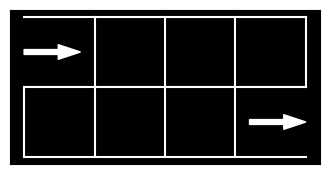

In [6]:
vertical = [
    [False, True, True, True],
    [True, True, True, True]]

horizontal = [
    [True, True, True, True],
    [True, True, True, True]]

plot_maze(vertical, horizontal, fig_height=2)

Ví dụ của một mê cung hợp lệ:

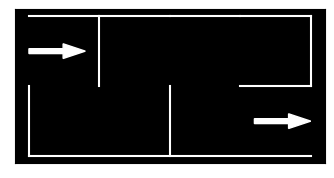

In [ ]:
vertical = [
    [False, True, False, False],
    [True, False, True, False]]

horizontal = [
    [True, True, True, True],
    [False, False, False, True]]

plot_maze(vertical, horizontal, fig_height=2)

**Yêu cầu**: Hãy hiện thực hàm <code>generate_maze()</code> với các tham số:
- <code>height</code>: Một số nguyên dương là số ô theo chiều dọc của mê cung. Để đơn giản, ta quy định số ô theo chiều ngang bằng gấp đôi số ô theo chiều dọc.  
- <code>seed</code>: Một số nguyên dương để bắt đầu khởi tạo các giá trị ngẫu nhiên. Tham số này đảm bảo hàm luôn tạo ra cùng một mê cung nếu nhận cùng <code>height</code> và <code>seed</code>.

Hàm trả về hai mảng hai chiều là thông tin về các mảng tường theo chiều dọc và chiều ngang như đã định nghĩa phía trên. Chú ý <code>vertical[0][0]</code> luôn bằng <code>False</code>.

**Gợi ý**: Sử dụng hàm <code>random.shuffle()</code> để trộn ngẫu nhiên một mảng.

In [7]:
import random

arr = [1, 2, 3, 4]
random.shuffle(arr)
arr

[2, 1, 3, 4]

In [9]:
# SOLUTION
from IPython import display
import time
import random

In [10]:
def generate_maze_recursive(pre_row, pre_col, row, col, width, height, visited, vertical, horizontal):
  # gan gia tri cho o da xet o hien tai
  visited[row][col] = True
  # xoa duong vien giua 2 o (o hien tai va o da xet truoc do)
  if pre_row == row:
    vertical[row][max(pre_col, col)] = False
  elif pre_col == col:
    horizontal[max(pre_row, row)][col] = False
  # hien thi qua trinh tao me cung (time)
  time.sleep(0.1)
  display.clear_output(wait=True)
  plot_maze(vertical, horizontal)

  neighbors = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)] # o xet ke tiep: tren duoi trai phai
  random.shuffle(neighbors) # tron mang

  # de quy cho nhung o lien ke
  for i, j in neighbors:
    # o chua cham den mep ngoai cua me cung => xet tiep
    if 0 <= i < height and 0 <= j < width and not visited[i][j]:
      generate_maze_recursive(row, col, i, j, width, height, visited, vertical, horizontal)

In [11]:
def generate_maze(height, seed=2021):
    random.seed(seed)
    # khai bao bien/ danh sach can thiet
    width = height * 2
    visited = [[False for _ in range(width)] for _ in range(height)]
    vertical = [[True for _ in range(width)] for _ in range(height)]
    horizontal = [[True for _ in range(width)] for _ in range(height)]

    # bat dau tao me cung
    start_cell = {"x": 0, "y": 0}
    pre_cell = {"x": 0, "y": -1}
    generate_maze_recursive(pre_cell["x"], pre_cell["y"], start_cell["x"], start_cell["y"], width, height, visited, vertical, horizontal)

    return vertical, horizontal

Kết quả mong đợi như bên dưới:

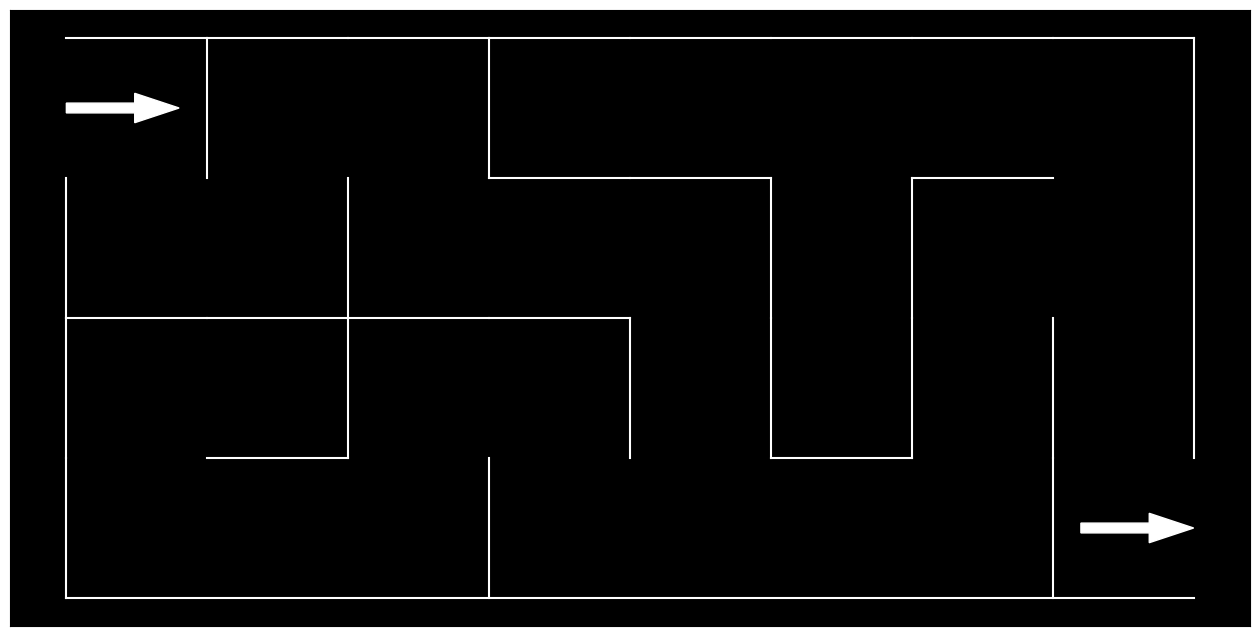

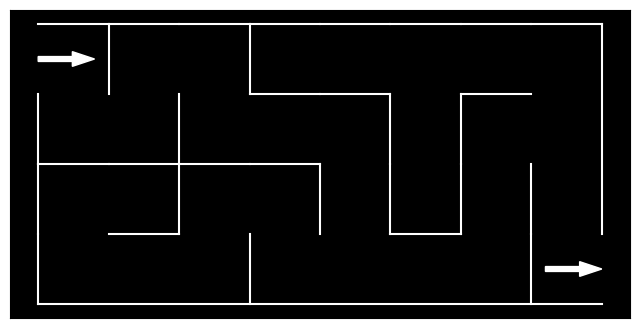

In [12]:
vertical, horizontal = generate_maze(4)
plot_maze(vertical, horizontal, fig_height=4)

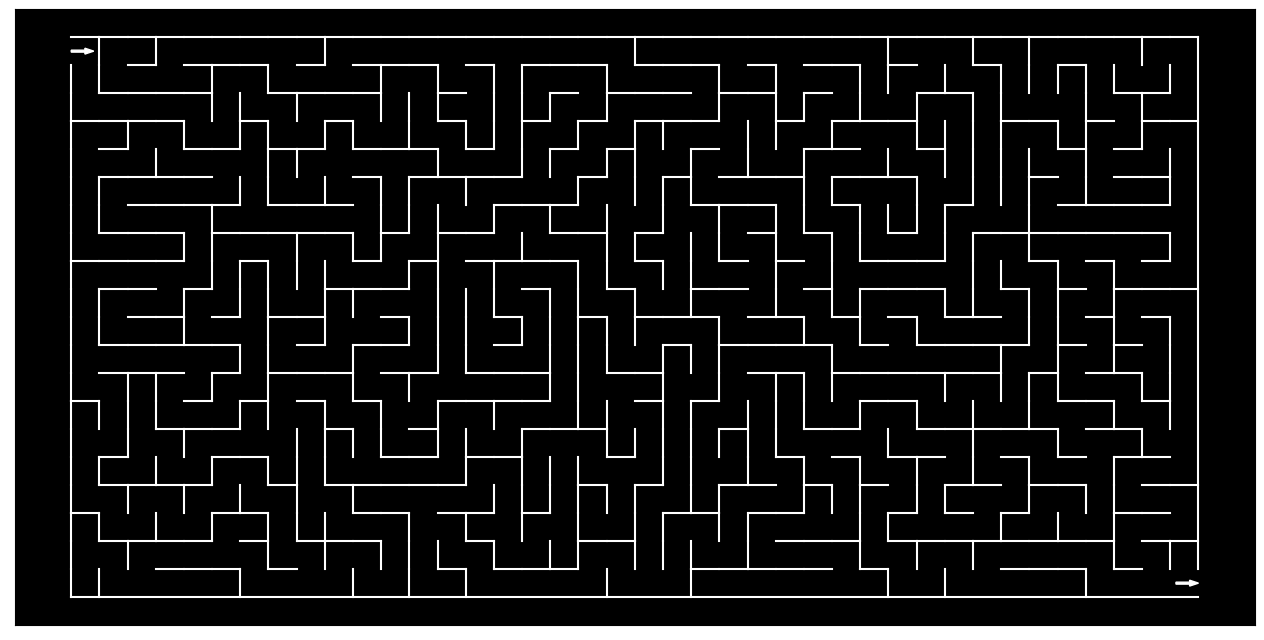

In [ ]:
vertical, horizontal = generate_maze(20, seed=42)
plot_maze(vertical, horizontal)